### Import Library

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import tensorflow as tf

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca

from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords
from gensim.models import Word2Vec

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import HTML
from tensorflow.keras.preprocessing.text import Tokenizer



In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sltna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sltna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sltna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Import dataset

In [3]:
df = pd.read_csv("primevideo_review.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,beb06482-3bbd-4591-9a08-6cdf291c1245,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The good things first. The movie content is su...,3,4,3.0.388.547,2024-11-15 19:57:30,NaN,NaN,3.0.388.547
1,12bcf363-5058-4ce6-acd5-c8a7ade30ce8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Downloaded some series to watch offline later....,1,66,3.0.377.2547,2024-08-19 13:21:32,NaN,NaN,3.0.377.2547
2,16da9503-9408-445f-acbf-c195055e4133,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Keep crashing after the update, can't play bac...",1,12,3.0.372.647,2024-06-25 03:05:25,NaN,NaN,3.0.372.647
3,f605dcfc-8bbd-4a8f-b834-791ecbef53f5,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Somehow only this app does not work on all my ...,1,5,3.0.370.2047,2024-05-31 03:13:33,NaN,NaN,3.0.370.2047
4,c6406230-341e-4b33-872a-892c0e584b29,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Less Stable than on an iPad. Sometimes, there ...",3,2,3.0.388.847,2024-11-13 08:58:41,NaN,NaN,3.0.388.847


### Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              99000 non-null  object 
 1   userName              99000 non-null  object 
 2   userImage             99000 non-null  object 
 3   content               99000 non-null  object 
 4   score                 99000 non-null  int64  
 5   thumbsUpCount         99000 non-null  int64  
 6   reviewCreatedVersion  89529 non-null  object 
 7   at                    99000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            89529 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.3+ MB


In [5]:
df = df.drop(["userName", "userImage", "repliedAt","replyContent","appVersion","reviewCreatedVersion","reviewId","at"],axis = 1)

In [6]:
df.isna().sum()

content          0
score            0
thumbsUpCount    0
dtype: int64

In [7]:
df.shape

(99000, 3)

<AxesSubplot:xlabel='score', ylabel='count'>

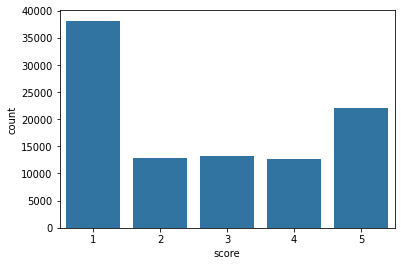

In [8]:
sns.countplot(x='score', data = df)

#### Cleaning Text

In [6]:
def cleaning_content(content):
    # remove numbers
    content = re.sub(r'[\d]+', '', content) 
    
    # remove hashtag
    content = re.sub(r'#[\w]+', '', content) 
    
    # remove mentions
    content = re.sub(r'@[\w]+', '', content) 
    
    # remove link
    content = re.sub(r"http[\S]+", '', content) 
    
    # replace new line into space
    content = content.replace('\n', ' ')
    
    # remove all punctuations
    punct = list(string.punctuation)
    content = [i for i in content if i not in punct]
    content = ''.join(content)
    
    # remove additional whitespace
    content = content.split()
    content = ' '.join(content)

    # remove characters space from both left and right content
    content = content.strip(' ') 
    
    return content

In [7]:
# applying cleaning function for content columns, and store it to another column called `text_cleaned`
df['content_cleaned'] = df['content'].apply(cleaning_content)

# print content example
print(f"{df['content_cleaned'].iloc[0]}\n")

The good things first The movie content is sufficient and good The clarity of movies available is good The play rate and video buffering is somewhat better than Netflix star for each good The poor now Despite writing in to Amazon Prime the search option does not show all the movies available under the name One has to manually try and find it among the movie choices Prime also does not show easily and readily the exclusive content You need to scroll over to look for it Hence stars



#### CaseFolding

In [8]:
def casefolding(content):
    return content.lower()

In [9]:
# lowercase the content
df['content_lower'] = df['content_cleaned'].apply(casefolding)

print(f"{df['content_lower'].iloc[0]}\n")

the good things first the movie content is sufficient and good the clarity of movies available is good the play rate and video buffering is somewhat better than netflix star for each good the poor now despite writing in to amazon prime the search option does not show all the movies available under the name one has to manually try and find it among the movie choices prime also does not show easily and readily the exclusive content you need to scroll over to look for it hence stars



#### Tokenize

In [10]:
def tokenize(content):
    return word_tokenize(content)

In [11]:
# applying tokenizing for each rows of lowercase content
df['content_tokenized'] = df['content_lower'].apply(tokenize)

print(f"{df['content_tokenized'].iloc[0]}\n")

['the', 'good', 'things', 'first', 'the', 'movie', 'content', 'is', 'sufficient', 'and', 'good', 'the', 'clarity', 'of', 'movies', 'available', 'is', 'good', 'the', 'play', 'rate', 'and', 'video', 'buffering', 'is', 'somewhat', 'better', 'than', 'netflix', 'star', 'for', 'each', 'good', 'the', 'poor', 'now', 'despite', 'writing', 'in', 'to', 'amazon', 'prime', 'the', 'search', 'option', 'does', 'not', 'show', 'all', 'the', 'movies', 'available', 'under', 'the', 'name', 'one', 'has', 'to', 'manually', 'try', 'and', 'find', 'it', 'among', 'the', 'movie', 'choices', 'prime', 'also', 'does', 'not', 'show', 'easily', 'and', 'readily', 'the', 'exclusive', 'content', 'you', 'need', 'to', 'scroll', 'over', 'to', 'look', 'for', 'it', 'hence', 'stars']



#### Remove Stopwords

In [12]:
def filter_stopwords(content):
    list_stopwords = set(stopwords.words('english'))
    
    filtered = []
    for word in content:
        if word not in list_stopwords:
            filtered.append(word)

    return filtered

In [13]:
# applying tokenizing for each rows of lowercase content
df['without_stopwords'] = df['content_tokenized'].apply(filter_stopwords)

print(f"{df['without_stopwords'].iloc[0]}\n")

['good', 'things', 'first', 'movie', 'content', 'sufficient', 'good', 'clarity', 'movies', 'available', 'good', 'play', 'rate', 'video', 'buffering', 'somewhat', 'better', 'netflix', 'star', 'good', 'poor', 'despite', 'writing', 'amazon', 'prime', 'search', 'option', 'show', 'movies', 'available', 'name', 'one', 'manually', 'try', 'find', 'among', 'movie', 'choices', 'prime', 'also', 'show', 'easily', 'readily', 'exclusive', 'content', 'need', 'scroll', 'look', 'hence', 'stars']



In [14]:
def to_sentence(content):
    return ' '.join(content)

In [15]:
df['text_preprocessed'] = df['without_stopwords'].apply(to_sentence)

print(f"{df['text_preprocessed'].iloc[0]}\n")

good things first movie content sufficient good clarity movies available good play rate video buffering somewhat better netflix star good poor despite writing amazon prime search option show movies available name one manually try find among movie choices prime also show easily readily exclusive content need scroll look hence stars



### Labeling

In [16]:
# Initialize the lexicons
lexicon_positive = dict()
lexicon_negative = dict()

# Path to the local text file
file_path = 'vader_lexicon.txt'

try:
    # Open the text file in read mode
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Strip any leading/trailing whitespace
            line = line.strip()
            
            # Split the line into components
            parts = line.split('\t')
            
            # Check if the line has at least 2 parts (word and score)
            if len(parts) > 1:
                word = parts[0]  # The word/abbreviation is the first part
                score = float(parts[1])  # The score is the second part

                # Add to the appropriate lexicon based on the score
                if score > 0:
                    lexicon_positive[word] = 1  # Assuming score +1 for positive
                elif score < 0:
                    lexicon_negative[word] = -1  # Assuming score -1 for negative
                # If score is zero, you can choose whether to ignore it or handle it differently

except FileNotFoundError:
    print(f"The file at {file_path} was not found.")
except Exception as e:
    print(f"An error occurred: {e}")


In [17]:
def analysis_label(content):
    # iniitatate variable to store the final score
    score = 0

    # iterate each word to identify if it's negative or positive word
    for word in content.split():
        # if the word in the positive lexicon
        if word in lexicon_positive:
            # add the score by word positive score
            score += lexicon_positive[word]
            
        # if the word in the negative lexicon
        elif word in lexicon_negative:
            # add the score by word negative score
            score += lexicon_negative[word]


    # identify lebel based on final score
    if score > 0:
        return 'positive'
    else:
        return 'negative'

### EDA

In [19]:
# copying the cleaned dataset so we can have the original of cleaned dataset
df_labeled = df.copy()

# apply each content analysis to label either negative or positive
df_labeled['labels'] = df_labeled['text_preprocessed'].apply(analysis_label)

# count the number of negative and postiive label
df_labeled['labels'].value_counts()

labels
positive    58375
negative    40625
Name: count, dtype: int64

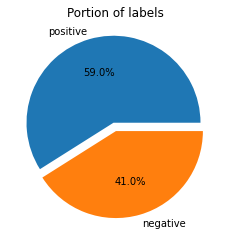

In [22]:
fig, ax = plt.subplots(figsize=(15, 4))

data = df_labeled['labels'].value_counts().tolist()
labels = df_labeled['labels'].value_counts().index.tolist()

ax.pie(x=data, labels=labels, explode=(0.1, 0), autopct='%1.1f%%')
ax.set_title('Portion of labels')
plt.show()

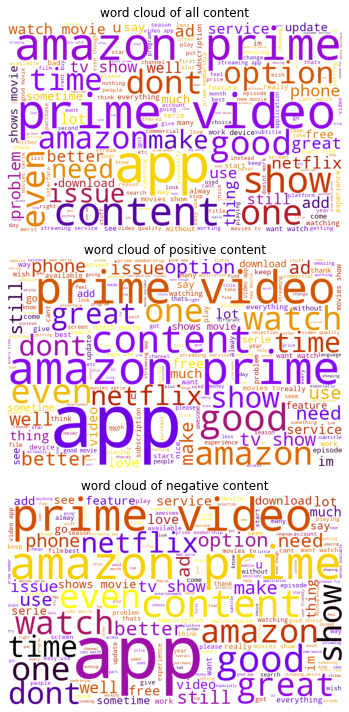

In [23]:
# initiate the variable to store all words or positive and negative labeled
words_list = ''
words_positive = ''
words_negative = ''

# add all words to list
for content in df['text_preprocessed']:
    for word in content:
        words_list += word

# add all postivie words to list
positive_contents = df_labeled['text_preprocessed'][df_labeled['labels'] == 'positive']
for content in positive_contents:
    for word in content:
        words_positive += word


# add all negative words to list
negative_contents = df_labeled['text_preprocessed'][df_labeled['labels'] == 'negative']
for content in positive_contents:
    for word in content:
        words_negative += word


fig, ax = plt.subplots(figsize=(25,10), nrows=3, ncols=1)
ax = ax.flatten()


wc = WordCloud(background_color='white', colormap='gnuplot', min_font_size=5, height=500, width=800).generate(words_list)
ax[0].imshow(wc)
ax[0].axis('off')
ax[0].set_title('word cloud of all content')

wc_pos = WordCloud(background_color='white', colormap='gnuplot', min_font_size=5, height=500, width=800).generate(words_positive)
ax[1].imshow(wc_pos)
ax[1].axis('off')
ax[1].set_title('word cloud of positive content')

wc_neg = WordCloud(background_color='white', colormap='gnuplot', min_font_size=5, height=500, width=800).generate(words_negative)
ax[2].imshow(wc_neg)
ax[2].axis('off')
ax[2].set_title('word cloud of negative content')

plt.tight_layout()

Text(0.5, 1.0, 'Most frequent words')

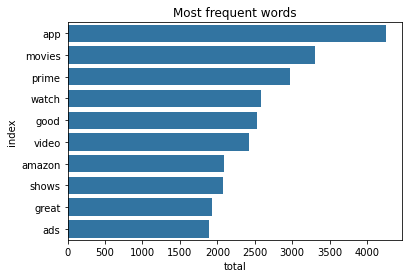

In [24]:
vectorizer = TfidfVectorizer()
corpus = vectorizer.fit_transform(df['text_preprocessed'])
corpus_df = pd.DataFrame(corpus.toarray(), columns=vectorizer.get_feature_names_out())
corpus_df = corpus_df.sum().reset_index(name='total')
corpus_df = corpus_df.sort_values(ascending=False, by='total').head(10)

sns.barplot(y='index', x='total', data=corpus_df)

plt.title('Most frequent words')

### Model Training

Skema training yang digunakan yaitu:
- Ekstraksi Fitur: TF-IDF
- Training: Random Forest dan Decision Tree
- Split data: 85/15

In [25]:
df_labeled.head()

,content,score,thumbsUpCount,content_cleaned,content_lower,content_tokenized,without_stopwords,text_preprocessed,labels
0,The good things first. The movie content is su...,3,4,The good things first The movie content is suf...,the good things first the movie content is suf...,"[the, good, things, first, the, movie, content...","[good, things, first, movie, content, sufficie...",good things first movie content sufficient goo...,positive
1,Downloaded some series to watch offline later....,1,66,Downloaded some series to watch offline later ...,downloaded some series to watch offline later ...,"[downloaded, some, series, to, watch, offline,...","[downloaded, series, watch, offline, later, ap...",downloaded series watch offline later app stil...,positive
2,"Keep crashing after the update, can't play bac...",1,12,Keep crashing after the update cant play back ...,keep crashing after the update cant play back ...,"[keep, crashing, after, the, update, cant, pla...","[keep, crashing, update, cant, play, back, boy...",keep crashing update cant play back boys seaso...,negative
3,Somehow only this app does not work on all my ...,1,5,Somehow only this app does not work on all my ...,somehow only this app does not work on all my ...,"[somehow, only, this, app, does, not, work, on...","[somehow, app, work, samsung, devices, netflix...",somehow app work samsung devices netflix disne...,positive
4,"Less Stable than on an iPad. Sometimes, there ...",3,2,Less Stable than on an iPad Sometimes there is...,less stable than on an ipad sometimes there is...,"[less, stable, than, on, an, ipad, sometimes, ...","[less, stable, ipad, sometimes, static, someti...",less stable ipad sometimes static sometimes bu...,positive


In [20]:
X = df_labeled['text_preprocessed']
y = df_labeled['labels']

#### Feature Extraction: TF-IDF

In [27]:
tfidf = TfidfVectorizer(max_features=500, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

#### Split data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.15, random_state=42)

print("Split data training: ", X_train.shape[0])
print("Split data testing: ", X_test.shape[0])

Split data training:  84150
Split data testing:  14850


In [30]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,able,absolutely,access,account,actually,ad,add,added,adding,additional,...,worse,worst,worth,would,wrong,year,years,yet,youre,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.139639,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98995,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.214557,0.0,0.0,0.0,0.0,0.0
98996,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98997,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
98998,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.253362,0.000000,0.0,0.0,0.0,0.0,0.0


### Start Training

#### Random Forest dan TF-IDF

In [31]:
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

In [32]:
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9985383244206774
Random Forest - accuracy_test: 0.8514478114478115


#### Decision Tree dan TF-IDF

In [33]:
# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9985383244206774
Decision Tree - accuracy_test: 0.7744107744107744


#### Feature Extraction: Word2Vec

Skema training yang digunakan yaitu:
- Ekstraksi Fitur: Word2Vec
- Training: Random LSTSM
- Split data: 80/20

In [21]:
# word2vec (word embedding)
X_tokenized = X.apply(word_tokenize)

In [22]:
word2vec = Word2Vec(sentences=X_tokenized,vector_size=250, window=3, min_count=1, workers=4)

In [23]:
vocab_size = 10000

# initiate tokenizer object
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X)

# transform sentences into token sequences
X_sequences = tokenizer.texts_to_sequences(X)

# padding sequences
max_seq_length = 80
X_padded = tf.keras.utils.pad_sequences(X_sequences, maxlen=max_seq_length,
                                truncating='post', padding='post')

In [24]:
# set embedding matrix
# define vocabulary size
vocab_size = min(len(tokenizer.word_index), vocab_size)
print(f'Vocabulary size: {vocab_size}')

# define embedding dimension
embedding_dims = word2vec.vector_size

# set null metrix for shape (vocab_size, embedding_dims)
embedding_matrix = np.zeros((vocab_size, embedding_dims))

# append the embeddings word2vec into matrix
for word, index in tokenizer.word_index.items():
    # check if there is index greater than vocab size, if yes the skip the index
    if index >= vocab_size:
        continue
    # check if the word exists in word2vec
    else:
        # store embedding word into embedding matrix
        embedding_matrix[index] = word2vec.wv[index]

print(f'embedding matrix size: {embedding_matrix.shape}')

Vocabulary size: 10000
embedding matrix size: (10000, 250)


In [25]:
# for label tokenizer
label_tokenizer = Tokenizer()

# fit on labels
label_tokenizer.fit_on_texts(y)

# to determine the token start with 0
label_index = {k-1 : v for k, v in label_tokenizer.index_word.items()}

# transform texts to sequnces of labels
labels = label_tokenizer.texts_to_sequences(y)
labels = np.array(labels) - 1 # subtract by 1, to ensure the label start with 0

print(f'First five labels:\n {labels[:5]}}}')
print(f'Label shape: {labels.shape}')

First five labels:
 [[0]
 [0]
 [1]
 [0]
 [0]]}
Label shape: (99000, 1)


In [26]:
# define dataset into tensorflow format
dataset = tf.data.Dataset.from_tensor_slices((X_padded, labels))

batch_size = 128
train_size = int(0.8 * len(dataset)) # train size = 80% of data

# set train split
train_set = dataset.take(train_size) # take first 80% size of data
test_set = dataset.skip(train_size) # skip first 80% size of data and take the rest

# shuffle the dataset
train_set = train_set.shuffle(buffer_size=len(train_set))
test_set = test_set.shuffle(buffer_size=len(test_set))

# print the inference
print(f'train data split length: {len(train_set)}')
print(f'\ntest data split length: {len(test_set)}')

# batch the dataset
train_set = train_set.batch(batch_size=batch_size)
test_set = test_set.batch(batch_size=batch_size)

train data split length: 79200

test data split length: 19800


In [27]:
# Define the input shape 
input = tf.keras.layers.Input((max_seq_length,), name='input_layer')
embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dims,
                                             weights=[embedding_matrix], trainable=True)(input)

# Add layersΩΩ
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, name="bilstm_layer", 
                                                       return_sequences=True))(embedding_layer)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, name="bilstm_layer_2", 
                                                       return_sequences=False))(x)
x = tf.keras.layers.Dense(64, activation="relu", name="ff_1")(x)
x = tf.keras.layers.Dense(16, activation='relu', name="ff_2")(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid", name="output_layer")(x)

# Create the model
model = tf.keras.Model(inputs=input, outputs=outputs, name="build_model")

# Print the model summary
model.summary()


Model: "build_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 80)]              0         
                                                                 
 embedding (Embedding)       (None, 80, 250)           2500000   
                                                                 
 bidirectional (Bidirection  (None, 80, 256)           388096    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 256)               394240    
 onal)                                                           
                                                                 
 ff_1 (Dense)                (None, 64)                16448     
                                                                 
 ff_2 (Dense)                (None, 16)               

In [28]:
class EarlyStopTrainingAtAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super().__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get('accuracy') # get accuracy metric from training
        val_acc = logs.get('val_accuracy') # get validation accuracy matric from training

        # condition if acc and val_acc has reached a target
        if (acc is not None and val_acc is not None) and (acc >= target_accuracy and val_acc >= target_accuracy):
            print(f'\naccuracy has reached the target ({self.target_accuracy}), stop training!')
            self.model.stop_training = True # stop training when condition is true


target_accuracy = 0.900 # set target accuracy

# define object of earlystopping
stop_training_cb = EarlyStopTrainingAtAccuracy(target_accuracy)

# callbacks for reduce learning rate
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='accuracy',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='max',
    min_lr=0.00001,
)

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=5e-4, momentum=0.8),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(train_set, epochs=50, validation_data=test_set, 
                    batch_size=batch_size, callbacks=[stop_training_cb, reduce_lr])

Epoch 1/50


619/619 [==============================] - 376s 595ms/step - loss: 0.3159 - accuracy: 0.8531 - val_loss: 0.1189 - val_accuracy: 0.9573 - lr: 5.0000e-04
Epoch 2/50
619/619 [==============================] - ETA: 0s - loss: 0.1126 - accuracy: 0.9560
accuracy has reached the target (0.9), stop training!
619/619 [==============================] - 440s 711ms/step - loss: 0.1126 - accuracy: 0.9560 - val_loss: 0.0560 - val_accuracy: 0.9811 - lr: 5.0000e-04


In [30]:
# Print training loss and accuracy
print("Training loss per epoch:")
print(history.history['loss'])  # Loss during training

print("Training accuracy per epoch:")
print(history.history['accuracy'])  # Accuracy during training

# Print validation loss and accuracy
print("Validation loss per epoch:")
print(history.history['val_loss'])  # Validation loss

print("Validation accuracy per epoch:")
print(history.history['val_accuracy'])  # Validation accuracy

Training loss per epoch:
[0.3158525824546814, 0.1126416027545929]
Training accuracy per epoch:
[0.8530934453010559, 0.956010103225708]
Validation loss per epoch:
[0.11889142543077469, 0.055992722511291504]
Validation accuracy per epoch:
[0.9572727084159851, 0.9810606241226196]


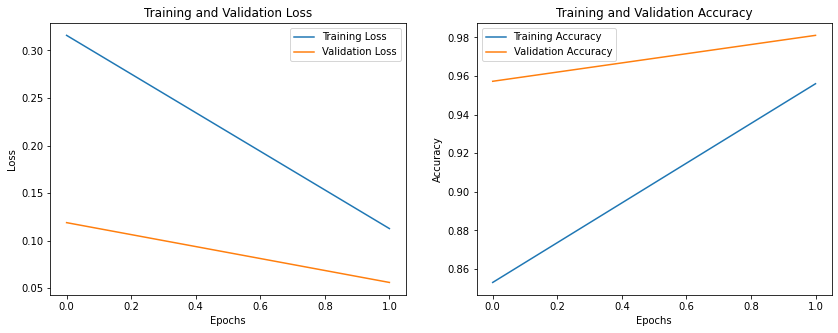

In [31]:
# Plot Training & Validation Loss
plt.figure(figsize=(14, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()